
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

### Interactive Spatial Uncertainty Model Checking with Accuracy Plots


#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

### Uncertainty Checking

Here is an interactive dashboard demonstrating spatial uncertainty model checking with the accuracy plot and uncertainty goodness cross validation-based approach proposed by Deutsch (1996) and included in Pyrcz and Deutsch (2014).

I have recorded a walk-through of this interactive dashboard in my TBA series on my [YouTube](https://www.youtube.com/@GeostatsGuyLectures) channel. I'm stoked to guide you and share observations and things to try out!  

* I have a lecture on [Model Checking](https://www.youtube.com/watch?v=AVms8JoUWXc&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=49) as part of my [Data Analytics and Geostatistics](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ). Note, for all my recorded lectures the interactive and well-documented workflow demonstrations are available in my GitHub repositorie:

    * [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos)
    * [GeostatsGuy's Data Science Interactive Python](https://github.com/GeostatsGuy/DataScience_Interactive_Python)

### Interactive Uncertainty Checking

Here's a simple workflow for checking the uncertainty model from simple kriging estimates and the estimation variance

* we assume a Gaussian local uncertainty model

#### Spatial Estimation

Consider the case of making an estimate at some unsampled location, $𝑧(\bf{u}_0)$, where $z$ is the property of interest (e.g. porosity etc.) and $𝐮_0$ is a location vector describing the unsampled location.

How would you do this given data, $𝑧(\bf{𝐮}_1)$, $𝑧(\bf{𝐮}_2)$, and $𝑧(\bf{𝐮}_3)$?

It would be natural to use a set of linear weights to formulate the estimator given the available data.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha})
\end{equation}

We could add an unbiasedness constraint to impose the sum of the weights equal to one.  What we will do is assign the remainder of the weight (one minus the sum of weights) to the global average; therefore, if we have no informative data we will estimate with the global average of the property of interest.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha}) + \left(1-\sum^{n}_{\alpha = 1} \lambda_{\alpha} \right) \overline{z}
\end{equation}

We will make a stationarity assumption, so let's assume that we are working with residuals, $y$. 

\begin{equation}
y^{*}(\bf{u}) = z^{*}(\bf{u}) - \overline{z}(\bf{u})
\end{equation}

If we substitute this form into our estimator the estimator simplifies, since the mean of the residual is zero.

\begin{equation}
y^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} y(\bf{u}_{\alpha})
\end{equation}

while satisfying the unbaisedness constraint.  

#### Kriging

Now the next question is what weights should we use?  

We could use equal weighting, $\lambda = \frac{1}{n}$, and the estimator would be the average of the local data applied for the spatial estimate. This would not be very informative.

We could assign weights considering the spatial context of the data and the estimate:

* **spatial continuity** as quantified by the variogram (and covariance function)
* **redundancy** the degree of spatial continuity between all of the available data with themselves 
* **closeness** the degree of spatial continuity between the avaiable data and the estimation location

The kriging approach accomplishes this, calculating the best linear unbiased weights for the local data to estimate at the unknown location.  The derivation of the kriging system and the resulting linear set of equations is available in the lecture notes.  Furthermore kriging provides a measure of the accuracy of the estimate!  This is the kriging estimation variance (sometimes just called the kriging variance).

\begin{equation}
\sigma^{2}_{E}(\bf{u}) = C(0) - \sum^{n}_{\alpha = 1} \lambda_{\alpha} C(\bf{u}_0 - \bf{u}_{\alpha})
\end{equation}

What is 'best' about this estimate? Kriging estimates are best in that they minimize the above estimation variance. 

#### Properties of Kriging

Here are some important properties of kriging:

* **Exact interpolator** - kriging estimates with the data values at the data locations
* **Kriging variance** can be calculated before getting the sample information, as the kriging estimation variance is not dependent on the values of the data nor the kriging estimate, i.e. the kriging estimator is homoscedastic. 
* **Spatial context** - kriging takes into account, furthermore to the statements on spatial continuity, closeness and redundancy we can state that kriging accounts for the configuration of the data and structural continuity of the variable being estimated.
* **Scale** - kriging may be generalized to account for the support volume of the data and estimate. We will cover this later.
* **Multivariate** - kriging may be generalized to account for multiple secondary data in the spatial estimate with the cokriging system. We will cover this later.
* **Smoothing effect** of kriging can be forecast. We will use this to build stochastic simulations later.

#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

\begin{equation}
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
\end{equation}

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

Note the correlogram is related to the covariance function as:

\begin{equation}
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
\end{equation}

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

\begin{equation}
-1.0 \le \rho_x(\bf{h}) \le 1.0
\end{equation}


#### Accuracy Plots

The accuracy plot was developed by Deutsch (1996) and described in Pyrcz and Deutsch (2014). 

* a method for checking uncertainty models

* based on calculating the percentiles of withheld testing data in the estimated local uncertainty distributions, $Z(\bf{u}_{\alpha})$, describes by CDFs, $F_Z(z,\bf{u}_{\alpha})$, at all testing locations $\alpha = 1,\ldots,n_{test}$.

The accuracy plot is the proportion of data within symmetric probability intervals vs. the probability interval, $p$.

* for example, 20% of withheld testing data should fall between the P40 and P60 probability interval 

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python    

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
%matplotlib inline
import os                                               # to set current working directory 
from sklearn.model_selection import train_test_split    # train and test data split by random selection of a proportion
from scipy.stats import norm                            # Gaussian distribution assumed for local uncertainty
import sys                                              # supress output to screen for interactive variogram modeling
import io                                               # set the working directory
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from matplotlib.pyplot import cm                        # color maps
from matplotlib.patches import Ellipse                  # plot an ellipse
import math                                             # sqrt operator                    
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import warnings
warnings.filterwarnings('ignore')
cmap = plt.cm.inferno

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Simple, Simple Kriging Function

Let's write a fast Python function to take data points and unknown location and provide the:

* **simple kriging estimate**

* **simple kriging variance / estimation variance**

* **simple kriging weights**

This provides a fast method for small datasets, with less parameters (no search parameters) and the ability to see the simple kriging weights 

In [3]:
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean):
# load the variogram
    nst = vario['nst']; pmx = 9999.9
    cc = np.zeros(nst); aa = np.zeros(nst); it = np.zeros(nst)
    ang = np.zeros(nst); anis = np.zeros(nst)
    nug = vario['nug']; sill = nug 
    cc[0] = vario['cc1']; sill = sill + cc[0]
    it[0] = vario['it1']; ang[0] = vario['azi1']; 
    aa[0] = vario['hmaj1']; anis[0] = vario['hmin1']/vario['hmaj1'];
    if nst == 2:
        cc[1] = vario['cc2']; sill = sill + cc[1]
        it[1] = vario['it2']; ang[1] = vario['azi2']; 
        aa[1] = vario['hmaj2']; anis[1] = vario['hmin2']/vario['hmaj2'];    

# set up the required matrices
    rotmat, maxcov = geostats.setup_rotmat(nug,nst,it,cc,ang,pmx)    
    ndata = len(df); a = np.zeros([ndata,ndata]); r = np.zeros(ndata); s = np.zeros(ndata); rr = np.zeros(ndata)
    nest = len(dfl)

    est = np.zeros(nest); var = np.full(nest,sill); weights = np.zeros([nest,ndata])

# Make and solve the kriging matrix, calculate the kriging estimate and variance 
    for iest in range(0,nest):
        for idata in range(0,ndata):
            for jdata in range(0,ndata):
                a[idata,jdata] = geostats.cova2(df[xcol].values[idata],df[ycol].values[idata],df[xcol].values[jdata],df[ycol].values[jdata],
                                        nst,nug,pmx,cc,aa,it,ang,anis,rotmat,maxcov)
            r[idata] = geostats.cova2(df[xcol].values[idata],df[ycol].values[idata],dfl[xlcol].values[iest],dfl[ylcol].values[iest],
                                        nst,nug,pmx,cc,aa,it,ang,anis,rotmat,maxcov)
            rr[idata] = r[idata]
        
        s = geostats.ksol_numpy(ndata,a,r)    
        sumw = 0.0
        for idata in range(0,ndata):                          
            sumw = sumw + s[idata]
            weights[iest,idata] = s[idata]
            est[iest] = est[iest] + s[idata]*df[vcol].values[idata]
            var[iest] = var[iest] - s[idata]*rr[idata]
        est[iest] = est[iest] + (1.0-sumw)*skmean
    return est,var,weights 

#### Set Global Parameters

These impact the look and results of this demonstration.

In [4]:
seed = 73073                                            # random number seed for train and test split and added error term
cmap = plt.cm.inferno                                   # color map
vmin = 0.0; vmax = 0.20                                 # feature min and max for plotting
error_std = 0.0                                         # error standard deviation
bins = 20                                               # number of bins for the accuracy plots

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [5]:
#os.chdir("c:/PGE383")                                   # set the working directory

#### Load and Visualize the Spatial Data

Here's the code to load our comma delimited data file in to a Pandas' DataFrame object and to visualize it.

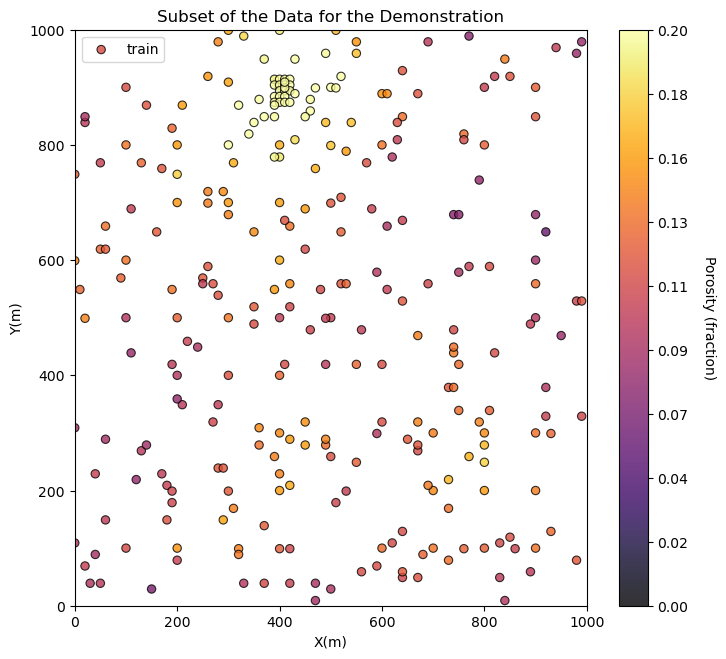

In [6]:
#df = pd.read_csv("sample_data_biased.csv")              # read a .csv file in as a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv") # load the data from Dr. Pyrcz's github repository

df['Porosity'] = df['Porosity']+norm.rvs(0.0,error_std,random_state = seed,size=len(df))

plt.subplot(111)
im = plt.scatter(df['X'],df['Y'],c=df['Porosity'],marker='o',cmap=cmap,vmin=vmin,vmax=vmax,alpha=0.8,linewidths=0.8,
        edgecolors="black",label="train")
plt.title("Subset of the Data for the Demonstration")
plt.xlim([0,1000]); plt.ylim([0,1000])
plt.xlabel('X(m)'); plt.ylabel('Y(m)'); plt.legend()
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10),format='%.2f')
cbar.set_label('Porosity (fraction)', rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Interactive Uncertainty Checking with Simple Kriging 

The following code includes:
* dashboard with variogram model, number of data and the proportion of testing data 
* plots of variogram model, train and test data locations, accuracy plot and training data with testing data percentiles

In [7]:
# import warnings; warnings.simplefilter('ignore')

# build the dashboard
style = {'description_width': 'initial'}
l = widgets.Text(value='                                              Simple Kriging, Michael Pyrcz, Associate Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
nug = widgets.FloatSlider(min = 0, max = 1.0, value = 0.0, step = 0.1, description = 'nug',orientation='vertical',continuous_update=False,
                          layout=Layout(width='50px', height='200px'))
nug.style.handle_color = 'gray'
it1 = widgets.Dropdown(options=['Spherical', 'Exponential', 'Gaussian'],value='Spherical',continuous_update=False,
    description='Type1:',disabled=False,layout=Layout(width='180px', height='30px'), style=style)

azi = widgets.FloatSlider(min=0, max = 360, value = 45, step = 22.5, description = 'azi',continuous_update=False,
                        orientation='vertical',layout=Layout(width='80px', height='200px'))
azi.style.handle_color = 'gray'
hmaj1 = widgets.FloatSlider(min=0.01, max = 10000.0, value = 5000.0, step = 500.0, description = 'hmaj1',continuous_update=False,
                        orientation='vertical',layout=Layout(width='80px', height='200px'))
hmaj1.style.handle_color = 'gray'
hmin1 = widgets.FloatSlider(min = 0.01, max = 10000.0, value = 3000.0, step = 500.0, description = 'hmin1',continuous_update=False,
                        orientation='vertical',layout=Layout(width='80px', height='200px'))
hmin1.style.handle_color = 'gray'

ptest = widgets.FloatSlider(min = 0.01, max = 0.9, value = 100.0, step = 0.1, description = 'prop test',continuous_update=False,
                        orientation='vertical',layout=Layout(width='80px', height='200px'))
ptest.style.handle_color = 'gray'

ndata = widgets.IntSlider(min = 1, max = len(df), value = 100, step = 10, description = 'number data',continuous_update=False,
                        orientation='vertical',layout=Layout(width='80px', height='200px'))
ndata.style.handle_color = 'gray'

uikvar = widgets.HBox([nug,it1,azi,hmaj1,hmin1,ptest,ndata],)  

uipars = widgets.HBox([uikvar],) 
uik = widgets.VBox([l,uipars],)

# convenience function ot convert variogram model type to a integer
def convert_type(it):
    if it == 'Spherical': 
        return 1
    elif it == 'Exponential':
        return 2
    else: 
        return 3

# calculate the kriging-based uncertainty distributions and match truth values to percentiles and product plots
def f_make_krige(nug,it1,azi,hmaj1,hmin1,ptest,ndata):                      
    text_trap = io.StringIO()
    sys.stdout = text_trap
    it1 = convert_type(it1)
    
    train, test = train_test_split(df.iloc[len(df)-ndata:,[0,1,3,]], test_size=ptest, random_state=73073)
    
    nst = 1; xlag = 10; nlag = int(hmaj1/xlag); c1 = 1.0-nug
    vario = GSLIB.make_variogram(nug,nst,it1,c1,azi,hmaj1,hmin1) # make model object
    index_maj,h_maj,gam_maj,cov_maj,ro_maj = geostats.vmodel(nlag,xlag,azi,vario) # project the model in the major azimuth                                                  # project the model in the 135 azimuth
    index_min,h_min,gam_min,cov_min,ro_min = geostats.vmodel(nlag,xlag,azi+90.0,vario) # project the model in the minor azimuth
    skmean = np.average(train['Porosity'])              # calculate the input mean and sill for simple kriging
    sill = np.var(train['Porosity'])
    
    sk_est, sk_var, sk_weights =  simple_simple_krige(train,'X','Y','Porosity',test,'X','Y',vario,skmean=skmean) # data, esitmation locations
    sk_std = np.sqrt(sk_var*sill)                       # standardize estimation variance by the sill and convert to std. dev.
    
    percentiles = norm.cdf(test['Porosity'],sk_est,sk_std) # calculate the percentiles of truth in the uncertainty models
    test["Percentile"] = percentiles
    
    xlag = 10.0; nlag = int(hmaj1/xlag)                 # lags for variogram plotting
    
    plt.subplot(221)                                    # plot variograms
    plt.plot([0,hmaj1*1.5],[1.0,1.0],color = 'black')
    plt.plot(h_maj,gam_maj,color = 'black',label = 'Major ' + str(azi))    
    plt.plot(h_min,gam_min,color = 'black',label = 'Minor ' + str(azi+90.0))
    deltas = [22.5, 45, 67.5]; 
    ndelta = len(deltas); hd = np.zeros(ndelta); gamd = np.zeros(ndelta);
    color=iter(cm.plasma(np.linspace(0,1,ndelta)))
    for delta in deltas:
        index,hd,gamd,cov,ro = geostats.vmodel(nlag,xlag,azi+delta,vario);
        c=next(color)
        plt.plot(hd,gamd,color = c,label = 'Azimuth ' + str(azi+delta))
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Interpolated NSCORE Porosity Variogram Models')
    plt.xlim([0,hmaj1*1.5])
    plt.ylim([0,1.4])
    plt.legend(loc='upper left')
  
    plt.subplot(222)                                    # plot the train and test data
    im = plt.scatter(train['X'],train['Y'],c=train['Porosity'],marker='o',s=30,cmap=cmap,vmin=vmin,vmax=vmax,alpha=0.8,
        linewidths=2.0,edgecolors="black",label="train",zorder=50)
    plt.scatter(test['X']+12.0,test['Y'],c=sk_est,marker='>',s=50,cmap=cmap,vmin=vmin,vmax=vmax,alpha=0.8,
        linewidths=0.5,edgecolors="black",label="test",zorder=10)
    plt.scatter(test['X']-12.0,test['Y'],c=test['Porosity'],marker='<',s=50,cmap=cmap,vmin=vmin,vmax=vmax,alpha=0.8,
        linewidths=0.5,edgecolors="black",label="truth",zorder=10)
    plt.scatter(test['X']-1,test['Y'],c='black',edgecolor='black',marker='o',s=7,cmap=cmap,vmin=vmin,vmax=vmax,alpha=0.8,
        linewidths=0.5,edgecolors="black",label="truth",zorder=100)
    plt.title("Training and Testing Data")
    plt.xlim([0,1000]); plt.ylim([0,1000])
    plt.xlabel('X(m)'); plt.ylabel('Y(m)')
    legend = plt.legend(loc='lower left',ncols=4,fancybox=True,facecolor='white',framealpha=1, frameon=True).set_zorder(10000)
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10),format='%.2f')
    cbar.set_label('Porosity (fraction)', rotation=270, labelpad=20)
    plt.grid(True)
    
    fraction_in = np.zeros(bins)                        # calculate and plot the accuracy plot
    p_intervals = np.linspace(0.0,1.0,bins)
    for i,p in enumerate(p_intervals): 
        test_result = (test['Percentile'] > 0.5-0.5*p) & (test['Percentile'] < 0.5+0.5*p)
        fraction_in[i] = test_result.sum()/len(test)

    plt.subplot(223)    
    plt.scatter(p_intervals,fraction_in,c='grey',edgecolor='black',marker='o',alpha=0.8,zorder=100)
    plt.plot([0.0,1.0],[0.0,1.0],c='grey',zorder=100,ls='--')
    plt.fill_between([0.1,1],[0,0.9],[0,0],color='red',alpha=0.2,zorder=1)
    plt.fill_between([0,0.9],[0.1,1.0],[1.0,1.0],color='yellow',alpha=0.2,zorder=1)
    plt.xlim([0.0,1.0]); plt.ylim([0,1.0])
    plt.annotate('Accurate and Precise',xy=[0.3,0.3],rotation=40,fontsize=16)
    plt.annotate('Inaccurate and Imprecise',xy=[0.4,0.1],rotation=40,fontsize=16)
    plt.annotate('Accurate and Imprecise',xy=[0.2,0.5],rotation=40,fontsize=16)
    plt.title('Uncertainty Model at Unknown Location')
    plt.xlabel('Probability Interval'); plt.ylabel('Fraction In the Interval')
    
    plt.subplot(224)                                      # plot the testing percentiles with the training data
    plt.scatter(train['X'],train['Y'],s=20,c='black',marker='o',cmap=cmap,vmin=vmin,vmax=vmax,alpha=0.8,linewidths=0.8,
        edgecolors="black",label="train")
    im = plt.scatter(test['X'],test['Y'],s=80.0,c=test['Percentile'],marker='^',cmap=cmap,vmin=0.0,vmax=1.0,alpha=0.8,linewidths=0.8,
        edgecolors="black",label="test")
    plt.title("Cross Validation Percentiles")
    plt.xlim([0,1000]); plt.ylim([0,1000])
    plt.xlabel('X(m)'); plt.ylabel('Y(m)'); plt.legend()
    cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(0.0, 1.0, 10),format='%.2f')
    cbar.set_label('Porosity Truth Percentile (fraction)', rotation=270, labelpad=20)    
    plt.grid(True) 

    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2.2, wspace=0.3, hspace=0.3)
    plt.show()
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make_krige, {'nug':nug, 'it1':it1, 'azi':azi, 'hmaj1':hmaj1, 'hmin1':hmin1, 'ptest':ptest, 'ndata':ndata})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Uncertianty Checking Kriging Demostration

* select the variogram model for simple kriging and observe the impact on the uncertainty model

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Inputs

Select the variogram model and the proportion of data withheld for testing.

* **nug**: nugget effect

* **c1**: contributions of the sill

* **hmaj1 / hmin1**: range in the major and minor direction

* **(x1, y1),...(x3,y3)**: spatial data locations  

* **test proportion**: proportion of data withheld for testing

In [8]:
display(uik, interactive_plot)                            # display the interactive plot

Output()

#### Comments

This was an interactive demonstration of uncertainty modeling checking with accuracy plots (Deutsch, 1996; Pyrcz and Deutsch, 2014). Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  

<i>&copy; Copyright daytum 2021. All Rights Reserved</i>